In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
import requests

# get the directory of the current file
current_dir = os.path.dirname(os.path.realpath('__file__'))

# print how many gpu's are available
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [32]:
images_dirs = []

images_1_dir = f"{current_dir}/data/images_001/images" # this is for debuggin and beta testing
images_dirs.append(f"{current_dir}/data/images_001/images")
images_dirs.append(f"{current_dir}/data/images_002/images")
images_dirs.append(f"{current_dir}/data/images_003/images")
images_dirs.append(f"{current_dir}/data/images_004/images")
images_dirs.append(f"{current_dir}/data/images_005/images")
images_dirs.append(f"{current_dir}/data/images_006/images")
images_dirs.append(f"{current_dir}/data/images_007/images")
images_dirs.append(f"{current_dir}/data/images_008/images")
images_dirs.append(f"{current_dir}/data/images_009/images")
images_dirs.append(f"{current_dir}/data/images_010/images")
images_dirs.append(f"{current_dir}/data/images_011/images")
images_dirs.append(f"{current_dir}/data/images_012/images")


data_folder_dir = f"{current_dir}\\data"
len(images_dirs)

12

In [4]:
def view_random_images(target_dir, num_images=4):
    target_folder = target_dir
    random_images = random.sample(os.listdir(target_folder), 4)
    fig, axes = plt.subplots(1, 4, figsize=(10, 10))
    axes = axes.flatten()
    for img, ax in zip(random_images, axes):
        img = mpimg.imread(target_folder + "/" + img)
        ax.imshow(img)
        ax.axis("off")
    plt.tight_layout()
    plt.show()

In [5]:
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name), # create filepath to save model
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True) # save only the best model to file

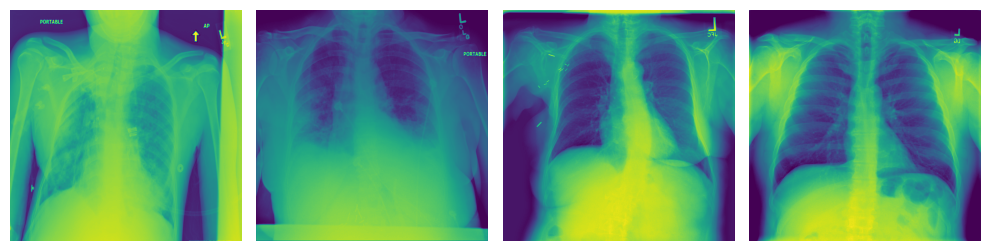

In [6]:
view_random_images(images_1_dir, 1)

In [7]:
all_labels = pd.read_csv(f"{current_dir}/data/Data_Entry_2017.csv")

len(all_labels)

112120

In [8]:
# delete the all columns except the image index, labels, patient age and patient gender
all_labels = all_labels.drop(["Follow-up #", "Patient ID", "Patient Age", "View Position", "OriginalImage[Width", "Height]", "OriginalImagePixelSpacing[x", "y]", "Unnamed: 11", "Patient Gender"], axis=1)

all_labels.head()

,Image Index,Finding Labels
0,00000001_000.png,Cardiomegaly
1,00000001_001.png,Cardiomegaly|Emphysema
2,00000001_002.png,Cardiomegaly|Effusion
3,00000002_000.png,No Finding
4,00000003_000.png,Hernia


In [9]:
# convert the all_labels finding labels column into mulitple true/false columns
all_labels = all_labels.join(all_labels["Finding Labels"].str.get_dummies(sep="|"))
# drop finding labels column
all_labels = all_labels.drop("Finding Labels", axis=1)

all_labels

,Image Index,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
0,00000001_000.png,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,00000001_001.png,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,00000001_002.png,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
3,00000002_000.png,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,00000003_000.png,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112115,00030801_001.png,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
112116,00030802_000.png,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
112117,00030803_000.png,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
112118,00030804_000.png,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [10]:
# geth the all columns of the all_labels dataframe
all_labels.columns

Index(['Image Index', 'Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema',
       'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass',
       'No Finding', 'Nodule', 'Pleural_Thickening', 'Pneumonia',
       'Pneumothorax'],
      dtype='object')

In [11]:
def get_the_image_count(dir):
    return len(os.listdir(dir))

In [12]:
# get the first 4999 rows from all_labels
images_1_image_count = get_the_image_count(images_1_dir)
images_2_image_count = get_the_image_count(images_2_dir)
images_3_image_count = get_the_image_count(images_3_dir)
images_4_image_count = get_the_image_count(images_4_dir)
images_5_image_count = get_the_image_count(images_5_dir)
images_6_image_count = get_the_image_count(images_6_dir)
images_7_image_count = get_the_image_count(images_7_dir)
images_8_image_count = get_the_image_count(images_8_dir)
images_9_image_count = get_the_image_count(images_9_dir)
images_10_image_count = get_the_image_count(images_10_dir)
images_11_image_count = get_the_image_count(images_11_dir)
images_12_image_count = get_the_image_count(images_12_dir)


images_1_labels = all_labels[:images_1_image_count]
images_2_labels = all_labels[images_1_image_count:images_1_image_count + images_2_image_count]
images_3_labels = all_labels[images_1_image_count + images_2_image_count:images_1_image_count + images_2_image_count + images_3_image_count]
images_4_labels = all_labels[images_1_image_count + images_2_image_count + images_3_image_count:images_1_image_count + images_2_image_count + images_3_image_count + images_4_image_count]
images_5_labels = all_labels[images_1_image_count + images_2_image_count + images_3_image_count + images_4_image_count:images_1_image_count + images_2_image_count + images_3_image_count + images_4_image_count + images_5_image_count]
images_6_labels = all_labels[images_1_image_count + images_2_image_count + images_3_image_count + images_4_image_count + images_5_image_count:images_1_image_count + images_2_image_count + images_3_image_count + images_4_image_count + images_5_image_count + images_6_image_count]
images_7_labels = all_labels[images_1_image_count + images_2_image_count + images_3_image_count + images_4_image_count + images_5_image_count + images_6_image_count:images_1_image_count + images_2_image_count + images_3_image_count + images_4_image_count + images_5_image_count + images_6_image_count + images_7_image_count]
images_8_labels = all_labels[images_1_image_count + images_2_image_count + images_3_image_count + images_4_image_count + images_5_image_count + images_6_image_count + images_7_image_count:images_1_image_count + images_2_image_count + images_3_image_count + images_4_image_count + images_5_image_count + images_6_image_count + images_7_image_count + images_8_image_count]
images_9_labels = all_labels[images_1_image_count + images_2_image_count + images_3_image_count + images_4_image_count + images_5_image_count + images_6_image_count + images_7_image_count + images_8_image_count:images_1_image_count + images_2_image_count + images_3_image_count + images_4_image_count + images_5_image_count + images_6_image_count + images_7_image_count + images_8_image_count + images_9_image_count]
images_10_labels = all_labels[images_1_image_count + images_2_image_count + images_3_image_count + images_4_image_count + images_5_image_count + images_6_image_count + images_7_image_count + images_8_image_count + images_9_image_count:images_1_image_count + images_2_image_count + images_3_image_count + images_4_image_count + images_5_image_count + images_6_image_count + images_7_image_count + images_8_image_count + images_9_image_count + images_10_image_count]
images_11_labels = all_labels[images_1_image_count + images_2_image_count + images_3_image_count + images_4_image_count + images_5_image_count + images_6_image_count + images_7_image_count + images_8_image_count + images_9_image_count + images_10_image_count:images_1_image_count + images_2_image_count + images_3_image_count + images_4_image_count + images_5_image_count + images_6_image_count + images_7_image_count + images_8_image_count + images_9_image_count + images_10_image_count + images_11_image_count]
images_12_labels = all_labels[images_1_image_count + images_2_image_count + images_3_image_count + images_4_image_count + images_5_image_count + images_6_image_count + images_7_image_count + images_8_image_count + images_9_image_count + images_10_image_count + images_11_image_count:images_1_image_count + images_2_image_count + images_3_image_count + images_4_image_count + images_5_image_count + images_6_image_count + images_7_image_count + images_8_image_count + images_9_image_count + images_10_image_count + images_11_image_count + images_12_image_count]

image_labels = [images_1_labels, images_2_labels, images_3_labels, images_4_labels, images_5_labels, images_6_labels, images_7_labels, images_8_labels, images_9_labels, images_10_labels, images_11_labels, images_12_labels]
label_image_counts = [images_1_image_count, images_2_image_count, images_3_image_count, images_4_image_count, images_5_image_count, images_6_image_count, images_7_image_count, images_8_image_count, images_9_image_count, images_10_image_count, images_11_image_count, images_12_image_count]

In [13]:
image_labels[0]

,Image Index,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
0,00000001_000.png,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,00000001_001.png,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,00000001_002.png,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
3,00000002_000.png,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,00000003_000.png,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,00001335_002.png,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4995,00001335_003.png,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4996,00001335_004.png,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4997,00001335_005.png,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [14]:
def add_path_to_labels(image_labels):
    for i in range(len(image_labels)):
        for j in range(image_labels[i].iloc[0].name, image_labels[i].iloc[-1].name + 1):
            image_labels[i].at[j, "Image Index"] = f"/images_{str(i+1).zfill(3)}" + image_labels[i].at[j, "Image Index"]
    return image_labels

In [15]:
# image_labels_with_paths = add_path_to_labels(image_labels)

In [16]:
# image_labels_with_paths[9]

In [17]:
# x = 8
# y = 30
# image_labels_with_paths[x].at[image_labels[x].iloc[0].name + y, "Image Index"]

In [18]:
len(images_1_labels), len(images_2_labels), len(images_12_labels)

(4999, 10000, 7121)

In [19]:
labels_in_order = ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema',
       'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass',
       'No Finding', 'Nodule', 'Pleural_Thickening', 'Pneumonia',
       'Pneumothorax']

In [20]:
images_train_labels = []
images_test_labels = []
train_test_split_size = 0.8

images_1_train_labels = image_labels[0][:int(images_1_image_count * train_test_split_size)]
images_1_test_labels = image_labels[0][int(images_1_image_count * train_test_split_size):]

images_train_labels.append(image_labels[0][:int(images_1_image_count * train_test_split_size)])
images_train_labels.append(image_labels[1][:int(images_2_image_count * train_test_split_size)])
images_train_labels.append(image_labels[2][:int(images_3_image_count * train_test_split_size)])
images_train_labels.append(image_labels[3][:int(images_4_image_count * train_test_split_size)])
images_train_labels.append(image_labels[4][:int(images_5_image_count * train_test_split_size)])
images_train_labels.append(image_labels[5][:int(images_6_image_count * train_test_split_size)])
images_train_labels.append(image_labels[6][:int(images_7_image_count * train_test_split_size)])
images_train_labels.append(image_labels[7][:int(images_8_image_count * train_test_split_size)])
images_train_labels.append(image_labels[8][:int(images_9_image_count * train_test_split_size)])
images_train_labels.append(image_labels[9][:int(images_10_image_count * train_test_split_size)])
images_train_labels.append(image_labels[10][:int(images_11_image_count * train_test_split_size)])
images_train_labels.append(image_labels[11][:int(images_12_image_count * train_test_split_size)])

images_test_labels.append(image_labels[0][int(images_1_image_count * train_test_split_size):])
images_test_labels.append(image_labels[1][int(images_2_image_count * train_test_split_size):])
images_test_labels.append(image_labels[2][int(images_3_image_count * train_test_split_size):])
images_test_labels.append(image_labels[3][int(images_4_image_count * train_test_split_size):])
images_test_labels.append(image_labels[4][int(images_5_image_count * train_test_split_size):])
images_test_labels.append(image_labels[5][int(images_6_image_count * train_test_split_size):])
images_test_labels.append(image_labels[6][int(images_7_image_count * train_test_split_size):])
images_test_labels.append(image_labels[7][int(images_8_image_count * train_test_split_size):])
images_test_labels.append(image_labels[8][int(images_9_image_count * train_test_split_size):])
images_test_labels.append(image_labels[9][int(images_10_image_count * train_test_split_size):])
images_test_labels.append(image_labels[10][int(images_11_image_count * train_test_split_size):])
images_test_labels.append(image_labels[11][int(images_12_image_count * train_test_split_size):])


len(images_1_train_labels), len(images_1_test_labels)

(3999, 1000)

In [26]:
images_train_labels[5]

,Image Index,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
44999,00011558_008.png,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
45000,00011558_009.png,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
45001,00011558_010.png,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
45002,00011558_011.png,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
45003,00011558_012.png,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52994,00013370_002.png,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
52995,00013370_003.png,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
52996,00013370_004.png,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
52997,00013370_005.png,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0


In [19]:
# data_folder_dir + images_1_train_labels.iloc[random.randint(0, len(images_1_train_labels))]["Image Index"]

In [33]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_dataframe(
    dataframe = images_train_labels[0],
    directory=images_dirs[0],
    x_col="Image Index",
    y_col=['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema',
       'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass',
       'No Finding', 'Nodule', 'Pleural_Thickening', 'Pneumonia',
       'Pneumothorax'],
    target_size=(224, 224),
    batch_size=32,
    class_mode="raw",
    shuffle=True,
    seed=42,
)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=images_test_labels[0],
    directory=images_dirs[0],
    x_col="Image Index",
    y_col=['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema',
            'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass',
            'No Finding', 'Nodule', 'Pleural_Thickening', 'Pneumonia',
            'Pneumothorax'],
    target_size=(224, 224),
    batch_size=32,
    class_mode="raw",
    shuffle=True,
    seed=42,
)

Found 3999 validated image filenames.
Found 1000 validated image filenames.


In [37]:
fine_tune_train_generetors = []
fine_tune_test_generetors = []


for i in range(1, 12):
    print(f"Running for: {i+1}")

    fine_tune_train_generetors.append(train_datagen.flow_from_dataframe(
        dataframe = images_train_labels[i],
        directory=images_dirs[i],
        x_col="Image Index",
        y_col=['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema',
            'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass',
            'No Finding', 'Nodule', 'Pleural_Thickening', 'Pneumonia',
            'Pneumothorax'],
        target_size=(224, 224),
        batch_size=32,
        class_mode="raw",
        shuffle=True,
        seed=42,
    ))

    fine_tune_test_generetors.append(test_datagen.flow_from_dataframe(
        dataframe=images_test_labels[i],
        directory=images_dirs[i],
        x_col="Image Index",
        y_col=['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema',
            'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass',
            'No Finding', 'Nodule', 'Pleural_Thickening', 'Pneumonia',
            'Pneumothorax'],
        target_size=(224, 224),
        batch_size=32,
        class_mode="raw",
        shuffle=True,
        seed=42,
    ))    

Running for: 2
Found 8000 validated image filenames.
Found 2000 validated image filenames.
Running for: 3
Found 8000 validated image filenames.
Found 2000 validated image filenames.
Running for: 4
Found 8000 validated image filenames.
Found 2000 validated image filenames.
Running for: 5
Found 8000 validated image filenames.
Found 2000 validated image filenames.
Running for: 6
Found 8000 validated image filenames.
Found 2000 validated image filenames.
Running for: 7
Found 8000 validated image filenames.
Found 2000 validated image filenames.
Running for: 8
Found 8000 validated image filenames.
Found 2000 validated image filenames.
Running for: 9
Found 8000 validated image filenames.
Found 2000 validated image filenames.
Running for: 10
Found 8000 validated image filenames.
Found 2000 validated image filenames.
Running for: 11
Found 8000 validated image filenames.
Found 2000 validated image filenames.
Running for: 12
Found 5696 validated image filenames.
Found 1425 validated image filenam

In [38]:
len(fine_tune_train_generetors), len(fine_tune_test_generetors)

(11, 11)

In [ ]:
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(15, activation='sigmoid')
])

model_1.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.RMSprop(lr=0.001),
    metrics=['accuracy']
)

model_1.fit(
    train_generator,
    epochs=5,
    steps_per_epoch=len(train_generator),
    validation_data=test_generator,
    validation_steps=len(test_generator),
    verbose=1
)


## FINE TUNE

In [77]:
fine_tune_index = 3
model_1.fit(
    fine_tune_train_generetors[fine_tune_index],
    epochs=2,
    steps_per_epoch=len(fine_tune_train_generetors[fine_tune_index]),
    validation_data=fine_tune_test_generetors[fine_tune_index],
    validation_steps=len(fine_tune_test_generetors[fine_tune_index]),
    verbose=1
)

Epoch 1/2
250/250 [==============================] - 233s 931ms/step - loss: 0.1983 - accuracy: 0.5629 - val_loss: 0.1883 - val_accuracy: 0.6010
Epoch 2/2
250/250 [==============================] - 129s 518ms/step - loss: 0.1934 - accuracy: 0.5611 - val_loss: 0.1923 - val_accuracy: 0.5915


In [79]:
for i in range(3, 7): # 3, 4, 5, 6
    model_1.fit(
    fine_tune_train_generetors[i],
    epochs=2,
    steps_per_epoch=len(fine_tune_train_generetors[i]),
    validation_data=fine_tune_test_generetors[i],
    validation_steps=len(fine_tune_test_generetors[i]),
    verbose=1
    )    

Epoch 1/2
250/250 [==============================] - 232s 928ms/step - loss: 0.2044 - accuracy: 0.5372 - val_loss: 0.2043 - val_accuracy: 0.5260
Epoch 2/2
250/250 [==============================] - 128s 513ms/step - loss: 0.1998 - accuracy: 0.5379 - val_loss: 0.2036 - val_accuracy: 0.5185
Epoch 1/2
250/250 [==============================] - 226s 906ms/step - loss: 0.2067 - accuracy: 0.5341 - val_loss: 0.2176 - val_accuracy: 0.4960
Epoch 2/2
250/250 [==============================] - 126s 504ms/step - loss: 0.2027 - accuracy: 0.5343 - val_loss: 0.2154 - val_accuracy: 0.4950
Epoch 1/2
250/250 [==============================] - 257s 1s/step - loss: 0.2138 - accuracy: 0.5163 - val_loss: 0.2158 - val_accuracy: 0.5030
Epoch 2/2
250/250 [==============================] - 129s 514ms/step - loss: 0.2102 - accuracy: 0.5189 - val_loss: 0.2081 - val_accuracy: 0.4930
Epoch 1/2
250/250 [==============================] - 258s 1s/step - loss: 0.2147 - accuracy: 0.5073 - val_loss: 0.2248 - val_accuracy

In [29]:
model_1.save(f"{current_dir}/models/saved_models/model_1_003.h5")

In [40]:
model_1 = tf.keras.models.load_model(f"{current_dir}/models/saved_models/model_1_002.h5")

In [42]:
model_1.evaluate(test_generator)

32/32 [==============================] - 23s 741ms/step - loss: 0.1934 - accuracy: 0.5580


[0.19340112805366516, 0.5580000281333923]

In [44]:
def load_and_prep_img(filename, img_shape=224):
  
  img = tf.io.read_file(filename)
  # Decode readed file into a tensor
  img = tf.image.decode_image(img)
  # If image is not square resize it to square  
  img = tf.image.resize(img, [img_shape, img_shape])

  # check if the image is grayscale and if it is convert it to rgb
  if img.shape[2] == 1:
    img = tf.image.grayscale_to_rgb(img)
    # Reshape the dimensions on image (3, 224, 224) -> (224, 224, 3)
    
    # Rescale the image
    img = img/255
    return tf.squeeze(img)

  # Rescale the image
  img = img/255

  return img

(224, 224, 3)
1/1 [==============================] - 0s 329ms/step
Prediction: [[0.15393128 0.50937015 0.03717557 0.00490006 0.19272007 0.02708167
  0.02285898 0.00199435 0.20156187 0.03409046 0.40823823 0.04389125
  0.03986882 0.02091628 0.01466318]]
Prediction: Cardiomegaly


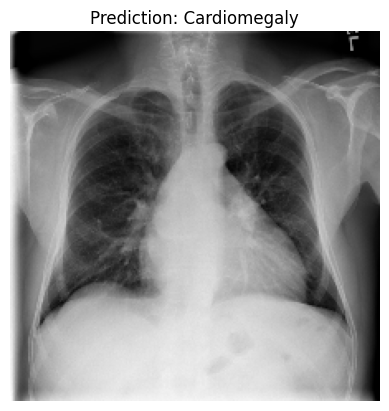

In [45]:
test_image = load_and_prep_img(f"{current_dir}/data/images_001/images/00000001_000.png")

print(test_image.shape)

test_pred = model_1.predict(tf.expand_dims(test_image, axis=0))
print(f"Prediction: {test_pred}")

# get the highest test_pred index
test_pred = tf.argmax(test_pred, axis=1)
test_pred = labels_in_order[test_pred[0]]
print(f"Prediction: {test_pred}")
# show the test_image with label "placeholder"
plt.imshow(test_image)
plt.title(f"Prediction: {test_pred}")
plt.axis(False);

1/1 [==============================] - 0s 17ms/step
Prediction: No Finding


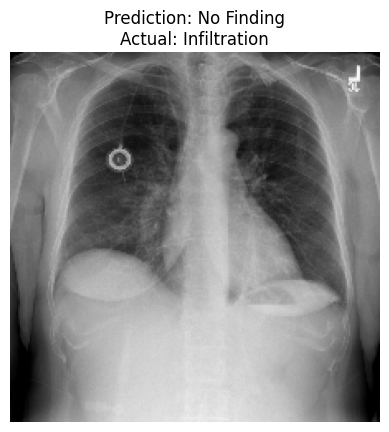

In [76]:
# get a random image from directory
random_image = random.choice(os.listdir(f"{current_dir}/data/images_001/images/"))

# get the image label from the dataframe
random_image_label = images_1_labels[images_1_labels["Image Index"] == random_image]
# list the true labels in random_image_label
random_image_label = random_image_label.iloc[:, 1:].values.tolist()[0]
random_image_label = tf.argmax(random_image_label, axis=0)
random_image_label = labels_in_order[random_image_label]
# print(f"Actual: {random_image_label}")

# plot random image with label "placeholder"
test_image = load_and_prep_img(f"{current_dir}/data/images_001/images/{random_image}")
test_pred = model_1.predict(tf.expand_dims(test_image, axis=0))
test_pred = tf.argmax(test_pred, axis=1)
test_pred = labels_in_order[test_pred[0]]
print(f"Prediction: {test_pred}")
plt.imshow(test_image)
plt.title(f"Prediction: {test_pred}\nActual: {random_image_label}")
plt.axis(False);